train.csv - Input features and target fare_amount values for the training set (about 55M rows).
test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('\content\drive')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
train_df=pd.read_csv(r"/content/contentdrive/MyDrive/train.csv",nrows=1000)
test_df=pd.read_csv(r"/content/contentdrive/MyDrive/test.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)


(1000, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(9914, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                1000 non-null   object 
 1   fare_amount        1000 non-null   float64
 2   pickup_datetime    1000 non-null   object 
 3   pickup_longitude   1000 non-null   float64
 4   pickup_latitude    1000 non-null   float64
 5   dropoff_longitude  1000 non-null   float64
 6   dropoff_latitude   1000 non-null   float64
 7   passenger_count    1000 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 62.6+ KB


#here we can see there are 8columns in which 6 numerics and 2 are object.
#Lets change the type of pickup_datetime from object to DateTime


In [ ]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [ ]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


#As this is Taxi fare data and we know there are many factors which affect the price of taxi like 
1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll


In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,11.469940,-72.126972,39.732521,-72.198714,39.773237,1.592000
std,9.499792,11.555398,6.365536,11.327382,6.240137,1.222715
min,2.500000,-74.438233,0.000000,-74.185996,0.000000,0.000000
25%,6.000000,-73.993044,40.735310,-73.991830,40.732978,1.000000
50%,8.500000,-73.982135,40.752876,-73.980246,40.753924,1.000000
75%,13.000000,-73.966590,40.766689,-73.962534,40.767705,2.000000
max,66.300000,0.000000,40.993260,0.000000,40.881878,6.000000


#Here first thing which we can see is minimum value of fare is negative which is -62 which is not the valid value, so we need to remove the fare which are negative values.
#Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.


In [ ]:
#Lets check if there is any null value
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#Here we can see there are 14 null values in drop_off latitude and longitude. as removing 14 to 28 rows from our huge dataset will not affect our analysis so, lets remove the rows having null values 


In [ ]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


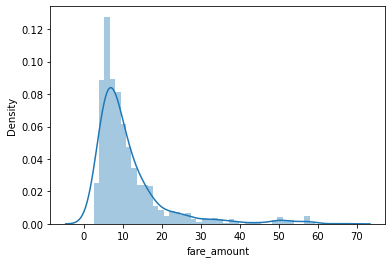

In [ ]:
sns.distplot(train_df['fare_amount'])

#In distribution plot also it can be seen that there are some values which are negative fare


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


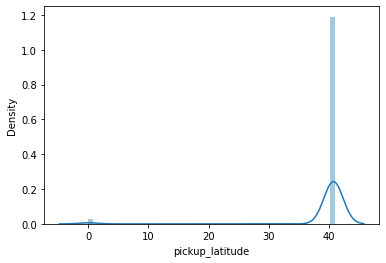

In [ ]:
sns.distplot(train_df['pickup_latitude'])

#Here we can see minimum value is going to be less than even -3000 which is not correct value and also on positive side also going more than 2000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


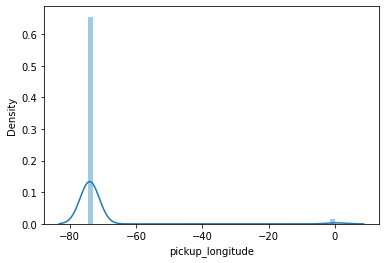

In [ ]:
sns.distplot(train_df['pickup_longitude'])

#Here also negative and positive values are excedding far behond the real limit.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


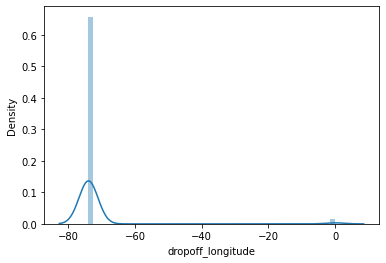

In [ ]:
sns.distplot(train_df['dropoff_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


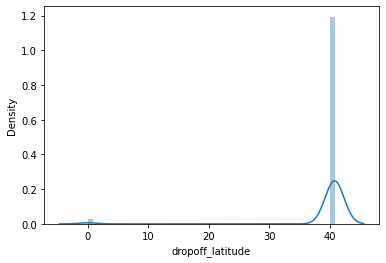

In [ ]:
sns.distplot(train_df['dropoff_latitude'])

In [ ]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


#we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york


In [ ]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [ ]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (1000, 8)
after droping (974, 8)


In [ ]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (974, 8)
after droping (974, 8)


#On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things


In [ ]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)


In [ ]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [ ]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                974 non-null    object             
 1   fare_amount        974 non-null    float64            
 2   pickup_datetime    974 non-null    datetime64[ns, UTC]
 3   pickup_longitude   974 non-null    float64            
 4   pickup_latitude    974 non-null    float64            
 5   dropoff_longitude  974 non-null    float64            
 6   dropoff_latitude   974 non-null    float64            
 7   passenger_count    974 non-null    int64              
 8   day                974 non-null    int64              
 9   hour               974 non-null    int64              
 10  weekday            974 non-null    int64              
 11  month              974 non-null    int64              
 12  year               974 non-null    int64          

In [ ]:
train_df=train_df[train_df['passenger_count']<=8]


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                974 non-null    object             
 1   fare_amount        974 non-null    float64            
 2   pickup_datetime    974 non-null    datetime64[ns, UTC]
 3   pickup_longitude   974 non-null    float64            
 4   pickup_latitude    974 non-null    float64            
 5   dropoff_longitude  974 non-null    float64            
 6   dropoff_latitude   974 non-null    float64            
 7   passenger_count    974 non-null    int64              
 8   day                974 non-null    int64              
 9   hour               974 non-null    int64              
 10  weekday            974 non-null    int64              
 11  month              974 non-null    int64              
 12  year               974 non-null    int64          

In [ ]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        974 non-null    float64
 1   pickup_longitude   974 non-null    float64
 2   pickup_latitude    974 non-null    float64
 3   dropoff_longitude  974 non-null    float64
 4   dropoff_latitude   974 non-null    float64
 5   passenger_count    974 non-null    int64  
 6   day                974 non-null    int64  
 7   hour               974 non-null    int64  
 8   weekday            974 non-null    int64  
 9   month              974 non-null    int64  
 10  year               974 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 91.3 KB


#lets divide the data set into train and validation test set


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x=train_df.drop("fare_amount", axis=1)
y=train_df['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)


In [ ]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
686,-73.959400,40.770300,-73.966300,40.760600,1,2,19,5,12,2011
882,-73.998010,40.756080,-73.982730,40.773340,1,22,17,1,9,2014
805,-73.969813,40.763205,-73.992668,40.721372,2,16,22,3,12,2009
788,-73.977032,40.750545,-73.990488,40.737205,1,12,13,3,3,2014
541,-73.979962,40.759952,-73.994670,40.723662,1,7,13,1,7,2014


In [ ]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
562,-74.016847,40.704765,-73.975607,40.748965,1,1,14,4,5,2014
139,-73.996986,40.755428,-73.953194,40.802101,3,31,7,0,5,2015
58,-74.002113,40.739582,-73.971918,40.791899,2,19,23,4,7,2012
828,-73.974776,40.771861,-73.980998,40.770901,1,12,17,3,6,2013
77,-74.006662,40.731210,-73.925940,40.825588,1,12,4,5,8,2011


In [ ]:
x_train.shape

(779, 10)

In [ ]:
x_test.shape

(195, 10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

In [ ]:
predictedvalues = lrmodel.predict(x_test)

In [ ]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)


RMSE value for Linear regression is 7.863363430362371


In [ ]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)


In [ ]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)


In [ ]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)


RMSE value for Random forest regression is  5.564918766642809


In [ ]:
#RandomForest Regressor is giving good value, so we can use it as final model